# Data pre-processing & Save data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

import sys
sys.path.insert(0, '/Users/JH/Documents/GitHub/PowerForecast/ver_06/util')
import app as ap
import os.path

In [2]:
load_data = ap.ReadCSV.load()
area_names = sorted(load_data.iterkeys())

weather_data = ap.ReadCSV.weather()

In [10]:
load_norm = dict()
for idx in xrange(0, len(area_names)):
    area = area_names[idx]
    load_norm[area], max_arg, min_arg = ap.Preprocess.normalization_load_data(load_data[area])
    print area + '\t\t',
    print 'max_arg = ' + str(max_arg) + ' / min_arg = ' + str(min_arg)

ACTEWAGL		max_arg = 214794.796 / min_arg = 24477.404
CITIPOWER		max_arg = 291943.374 / min_arg = 555.876
COUNTRYENERGY		max_arg = 790003.404 / min_arg = -69398.041
ENERGYAUST		max_arg = 1654120.123 / min_arg = 13644.434
INTEGRAL		max_arg = 1180409.09 / min_arg = 80866.136
POWERCOR		max_arg = 759347.605 / min_arg = 3636.704
TXU		max_arg = 640117.501 / min_arg = 39063.769
UMPLP		max_arg = 1066213.616 / min_arg = -6743.843
UNITED		max_arg = 630176.682 / min_arg = 1125.13
VICAGL		max_arg = 289276.792 / min_arg = -303.258


In [12]:
weather_norm = ap.Preprocess.normalization_weather_data(weather_data)

In [13]:
ap.SaveData.STLF.input_vector(load_norm, weather_norm)

saved files list :
  /Users/JH/Documents/GitHub/PowerForecast/ver_06/data/input_vector/STLF/ACTEWAGL/train_wd.csv
  /Users/JH/Documents/GitHub/PowerForecast/ver_06/data/input_vector/STLF/ACTEWAGL/test_wd.csv
  /Users/JH/Documents/GitHub/PowerForecast/ver_06/data/input_vector/STLF/ACTEWAGL/train_lwd.csv
  /Users/JH/Documents/GitHub/PowerForecast/ver_06/data/input_vector/STLF/ACTEWAGL/test_lwd.csv
  /Users/JH/Documents/GitHub/PowerForecast/ver_06/data/input_vector/STLF/ACTEWAGL/train_lww.csv
  /Users/JH/Documents/GitHub/PowerForecast/ver_06/data/input_vector/STLF/ACTEWAGL/test_lww.csv
  /Users/JH/Documents/GitHub/PowerForecast/ver_06/data/input_vector/STLF/ACTEWAGL/train_lwdw.csv
  /Users/JH/Documents/GitHub/PowerForecast/ver_06/data/input_vector/STLF/ACTEWAGL/test_lwdw.csv
  /Users/JH/Documents/GitHub/PowerForecast/ver_06/data/input_vector/STLF/CITIPOWER/train_wd.csv
  /Users/JH/Documents/GitHub/PowerForecast/ver_06/data/input_vector/STLF/CITIPOWER/test_wd.csv
  /Users/JH/Documents/GitH

In [14]:
load_df = ap.Numpy2Pandas.load_data2df(load_norm)

<IPython.core.display.Javascript object>


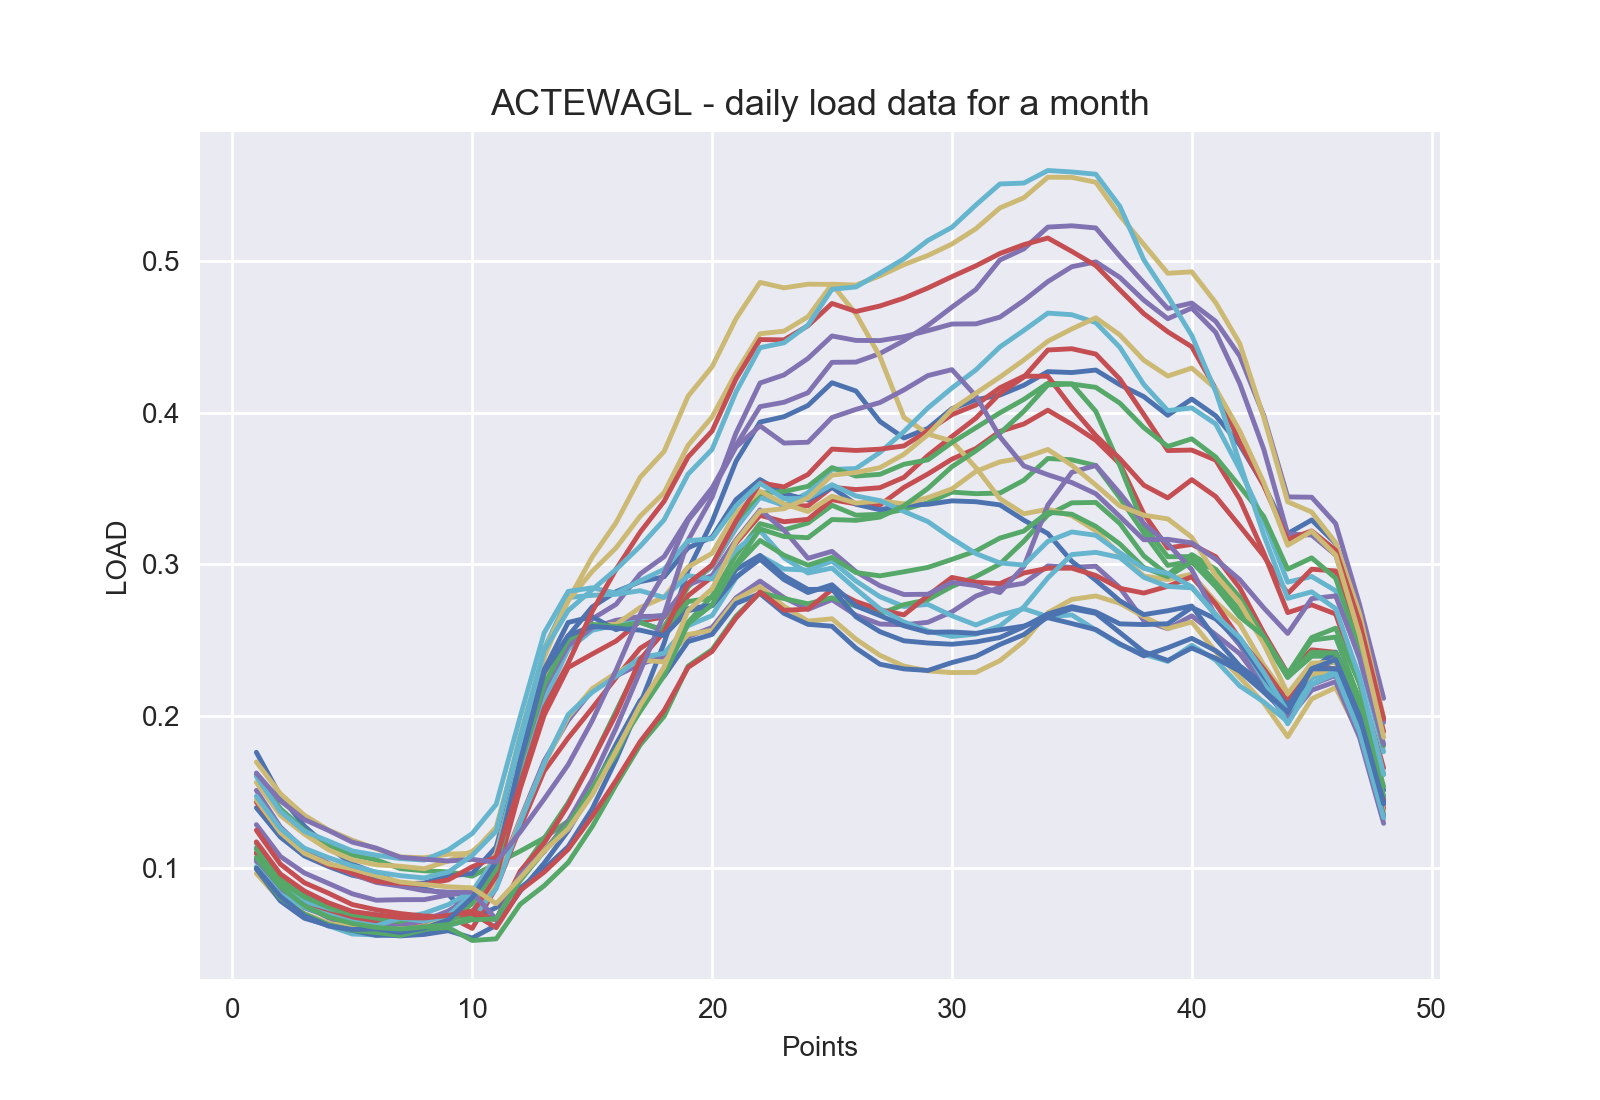

In [15]:
area_idx = 0
number_of_days = len(load_df[area_names[area_idx]])
y = 0
m = 0
y_delta=0
m_delta=1
start = 365*y + 30*m
end = 365*(y+y_delta) + 30*(m+m_delta)
for idx in xrange(start, end):
    plt.plot(load_df[area_names[area_idx]].iloc[idx])
plt.title(area_names[area_idx] + ' - daily load data for a month', fontsize=13)
plt.xlabel('Points', fontsize=10)
plt.ylabel('LOAD', fontsize=10)

In [16]:
plt.close()

In [17]:
weather_df = ap.Numpy2Pandas.weather_data2df(weather_norm)

<IPython.core.display.Javascript object>


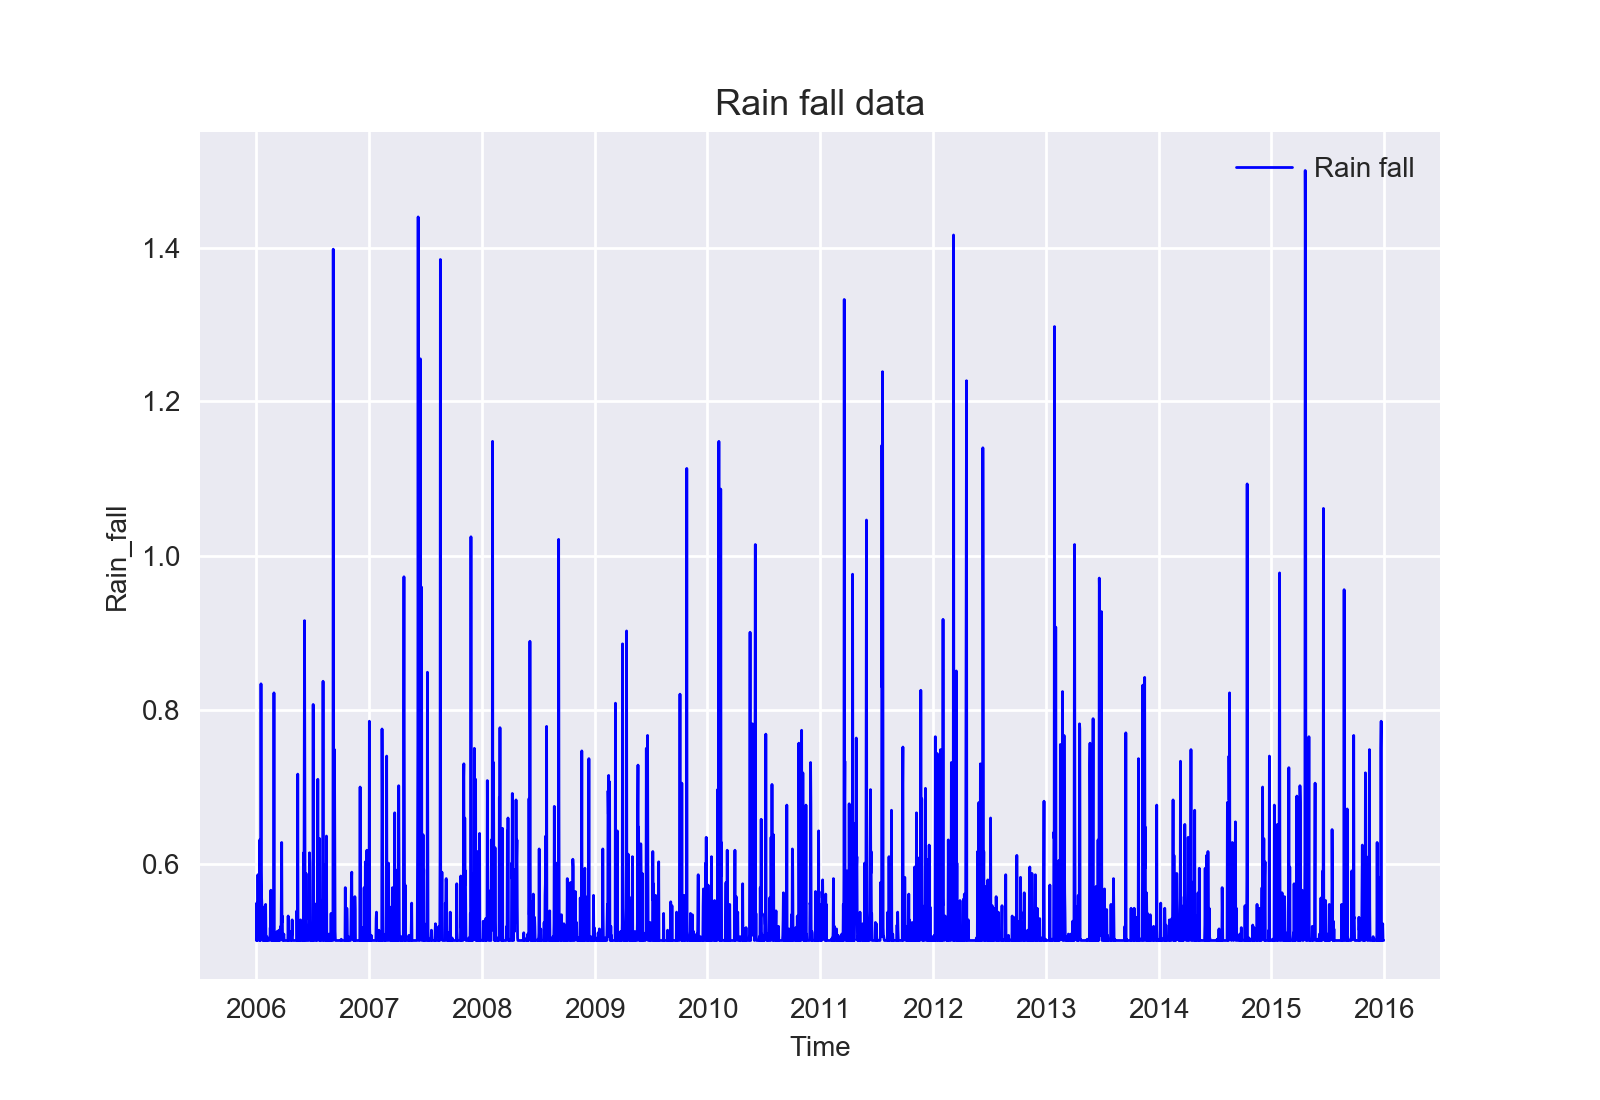

In [18]:
plt.plot(weather_df['Rain_fall'], label='Rain fall', color = 'blue', linewidth=1)
plt.legend(loc=1)
plt.title('Rain fall' + ' data', fontsize=13)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Rain_fall', fontsize=10)

In [19]:
plt.close()

<IPython.core.display.Javascript object>


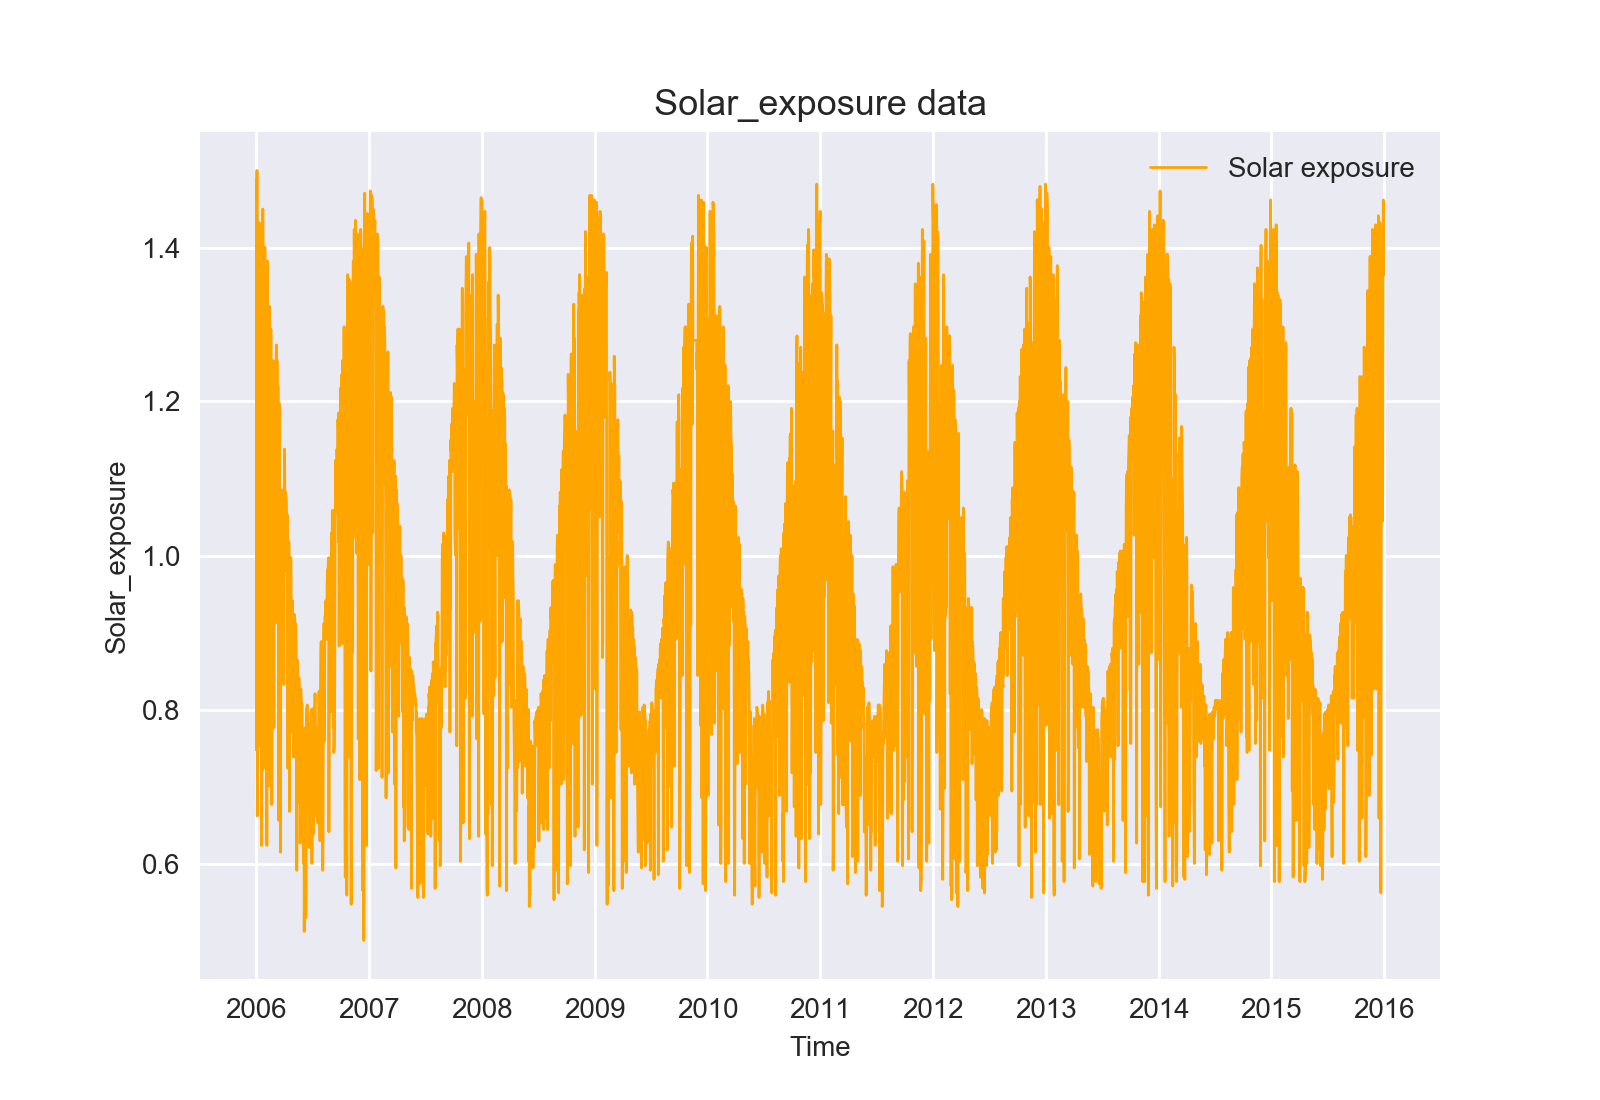

In [20]:
plt.plot(weather_df['Solar_exposure'], label='Solar exposure', color = 'orange', linewidth=1)
plt.legend(loc=1)
plt.title('Solar_exposure' + ' data', fontsize=13)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Solar_exposure', fontsize=10)

In [21]:
plt.close()

<IPython.core.display.Javascript object>


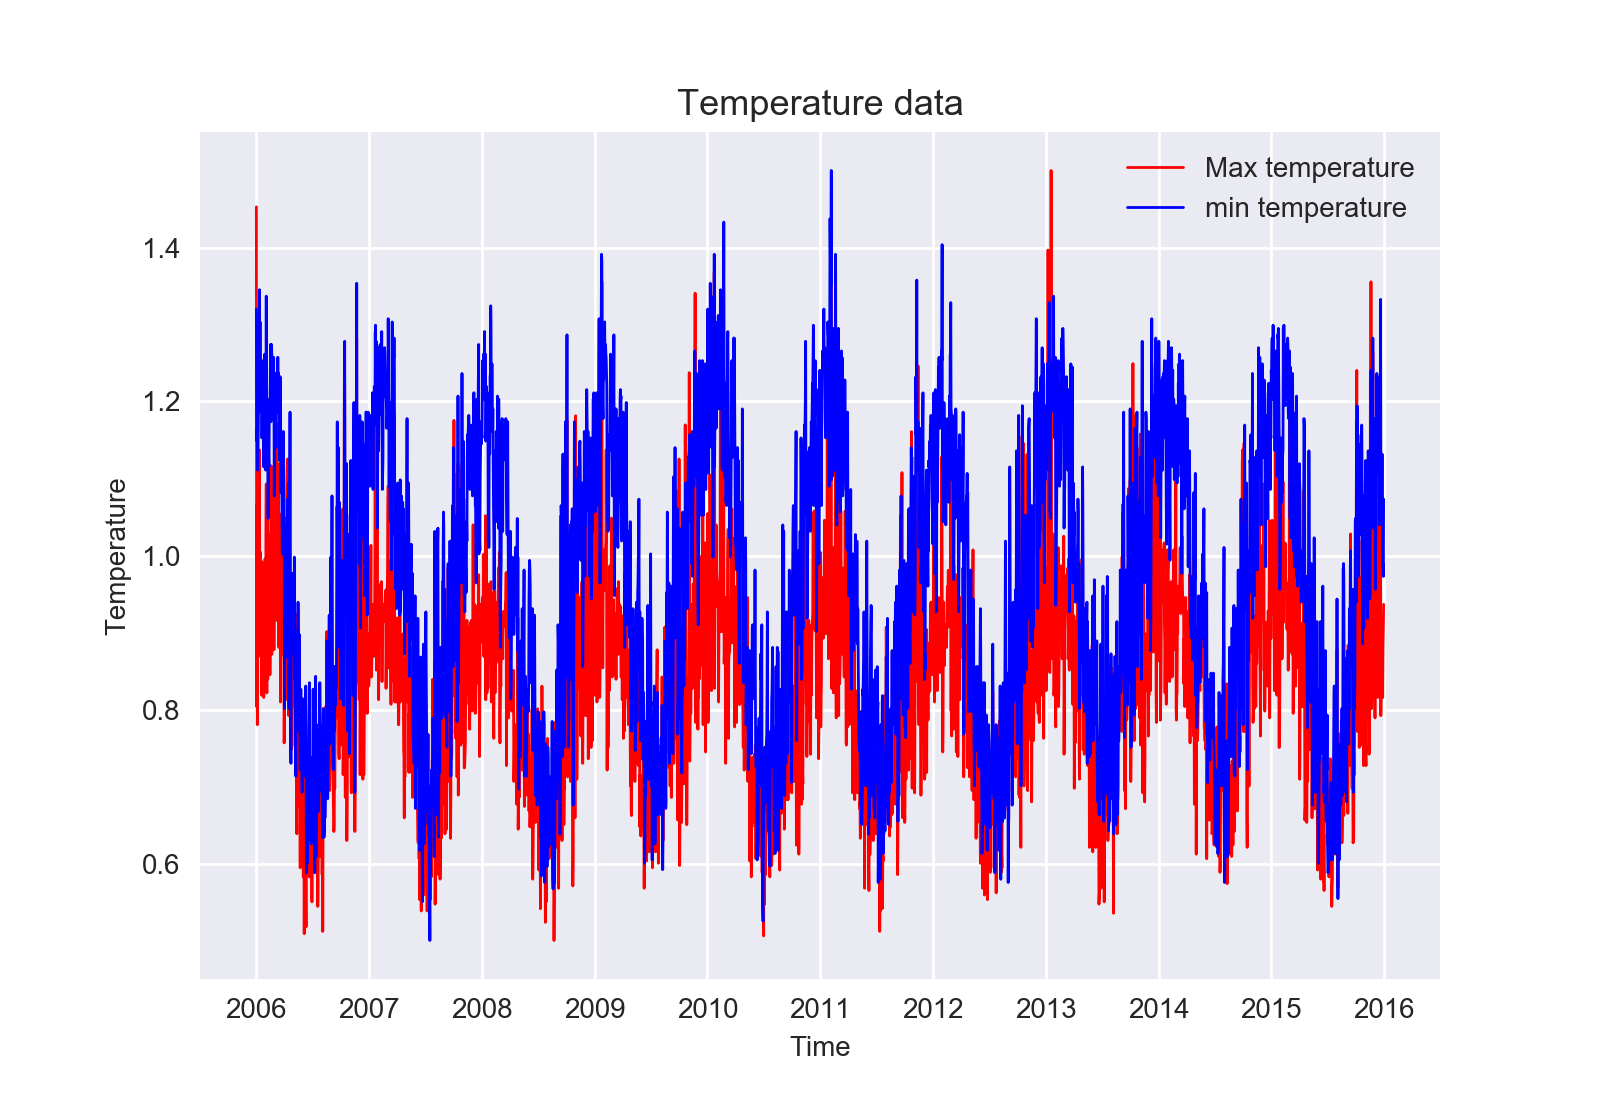

In [22]:
plt.plot(weather_df['Temperature_Max'], label='Max temperature', color = 'r', linewidth=1)
plt.plot(weather_df['Temperature_min'], label='min temperature', color = 'b', linewidth=1)
plt.legend(loc=1)
plt.title('Temperature' + ' data', fontsize=13)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Temperature', fontsize=10)

In [23]:
plt.close()